In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Week2_2023.06.06_Lab1_marketing_customer_analysis_clean.csv")

In [3]:
#df.head

In [7]:
# save numerical columns
dfNumeric = df._get_numeric_data()
print(dfNumeric.shape)
print(dfNumeric.columns)

# save categorical columns
dfCategorical = df.drop(list(dfNumeric.columns), axis=1, inplace=False)
print(dfCategorical.shape)
print(dfCategorical.columns)
#dfCategorical = df.drop([dfNumeric.columns], axis=1, inplace=False)

(10910, 10)
Index(['Unnamed: 0', 'customer lifetime value', 'income',
       'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'total claim amount', 'month'],
      dtype='object')
(10910, 16)
Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')


#### describe types, categories and ranges of dataframe
for col in df:
    if df[col].dtype.name == "object":
        #print("object category")
        df['number of open complaints'].astype(dtype = 'int64')
    if(df[col].dtype == 'float64' or df[col].dtype == 'int64'):
        print("float or int")

#### df['number of open complaints'] = df['number of open complaints'].astype(dtype = 'int64')

In [5]:
dfNumeric = dfNumeric.drop("Unnamed: 0",axis=1)

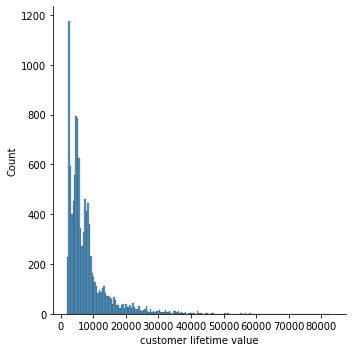

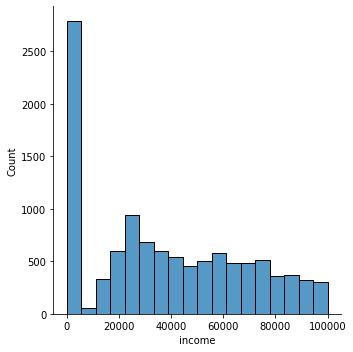

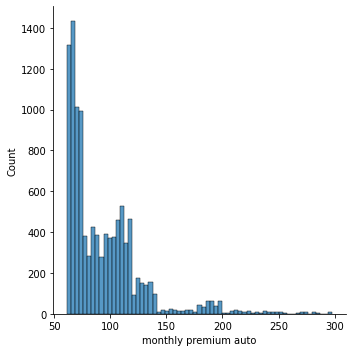

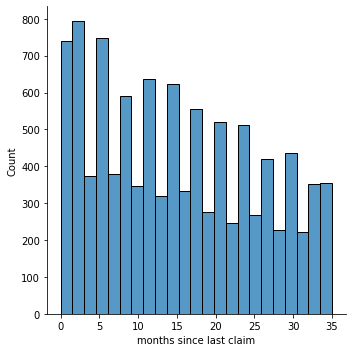

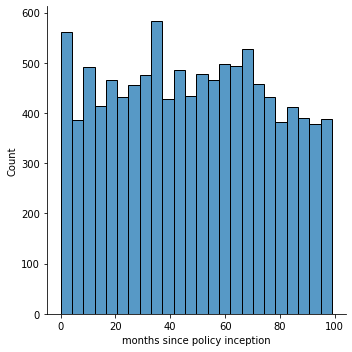

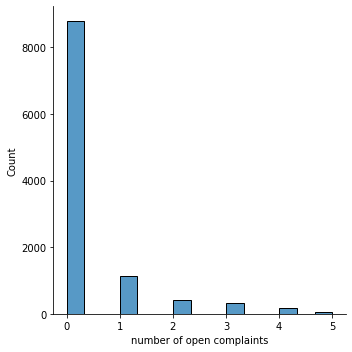

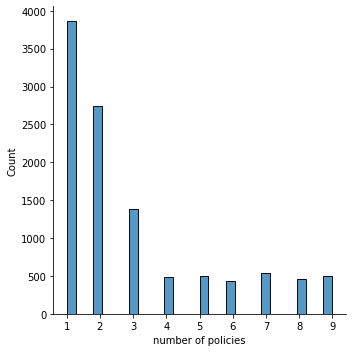

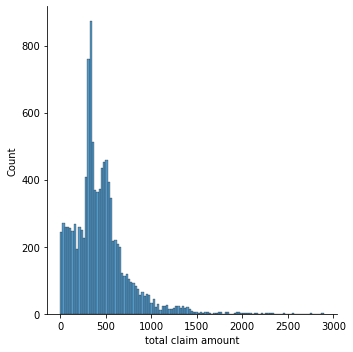

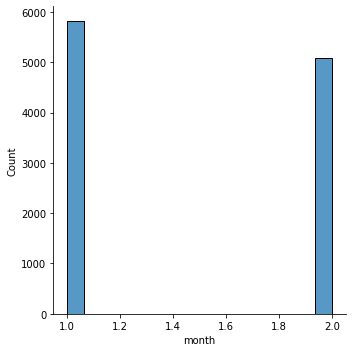

In [6]:
# using seaborn
for col in dfNumeric:
    sns.displot(dfNumeric[col])

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>],
       [<AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:title={'center':'total claim amount'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

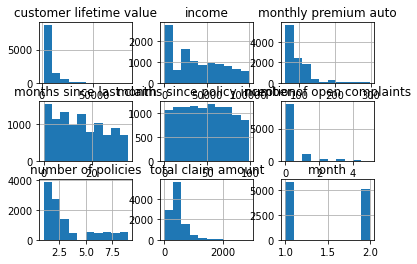

In [6]:
# using matplotlib
dfNumeric.hist()

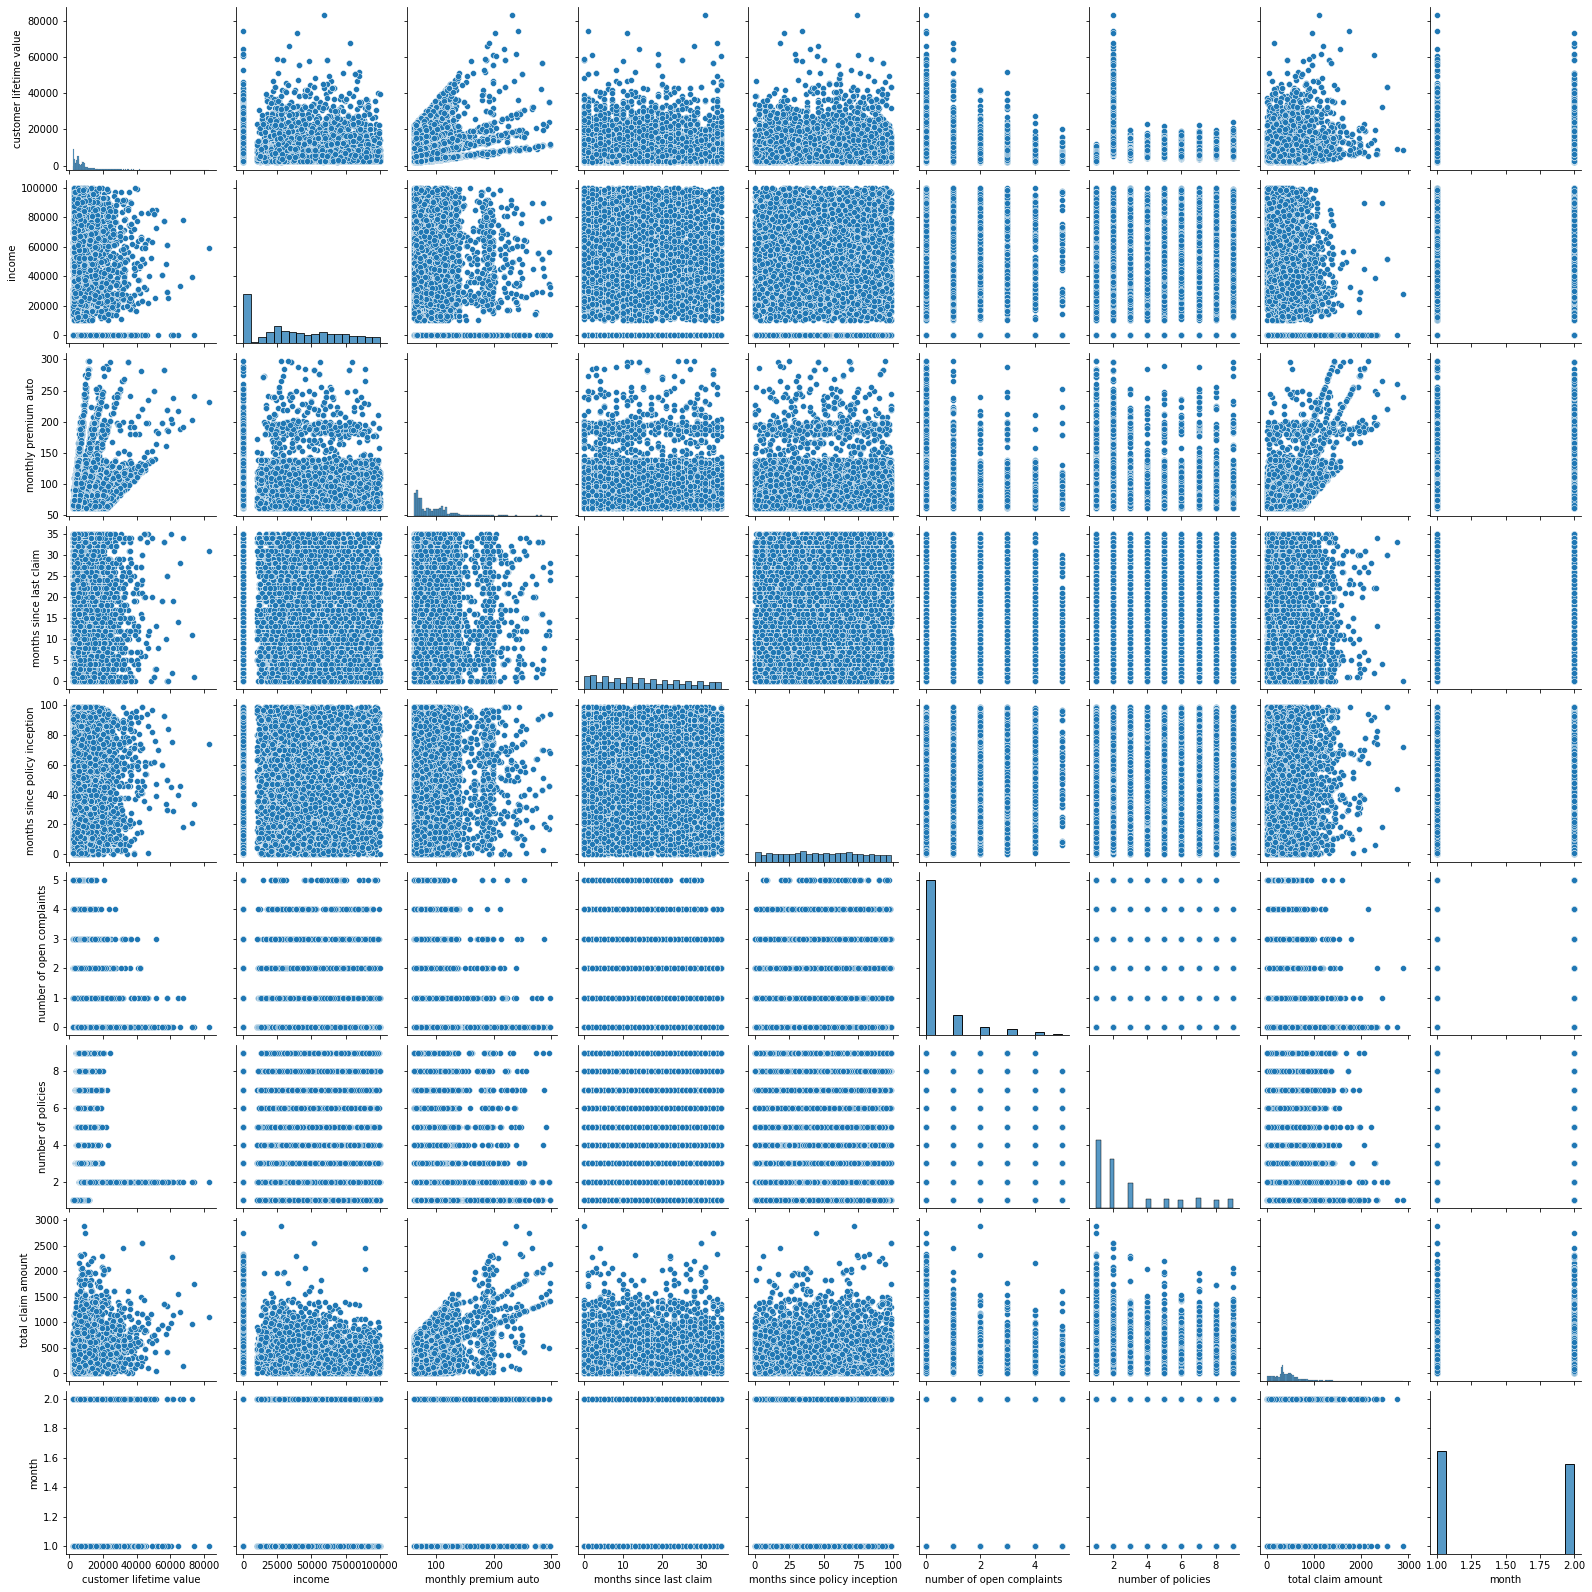

In [8]:
sns.pairplot(dfNumeric)

### None of the distributions look like normal distributions.

<AxesSubplot:>

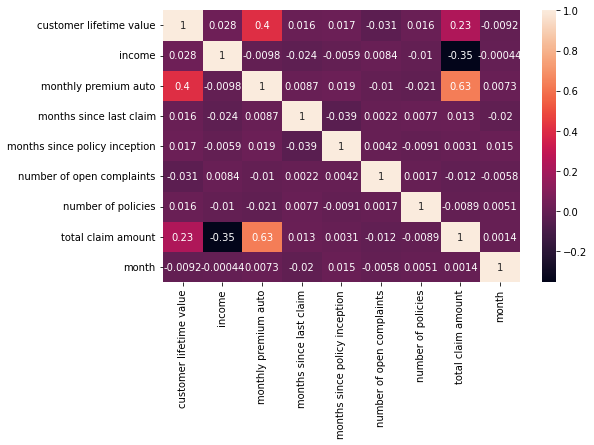

In [55]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(dfNumeric.corr(),annot=True)

### It is apparent that the inurance charges the customers that claim the most, the highest premium, meaning that the insurance's prediction algos/analysts work well. Furthermore the customers that are charged the most are also those with the highest lifetime value.

In [10]:
dfNumeric.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'month'],
      dtype='object')

In [11]:
dfCategorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

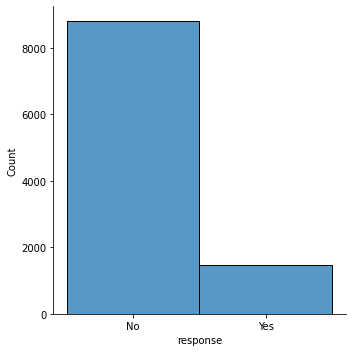

In [17]:
sns.displot(x = dfCategorical['response'])

In [10]:
dfCategorical["income"] = dfNumeric["income"]
dfCategorical["total claim amount"] = dfNumeric["total claim amount"]

In [36]:
responseBySalesChannel = dfCategorical.groupby(['sales channel', 'response'])['response'].count().rename('count').reset_index()
responseBySalesChannel.head()

,sales channel,response,count
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792


In [12]:
responseBySalesChannel.head
#responseBySalesChannel.shape
#responseBySalesChannel.columns

<bound method NDFrame.head of   sales channel response  count
0         Agent       No   3148
1         Agent      Yes    742
2        Branch       No   2539
3        Branch      Yes    326
4   Call Center       No   1792
5   Call Center      Yes    221
6           Web       No   1334
7           Web      Yes    177>

<AxesSubplot:xlabel='sales channel', ylabel='count'>

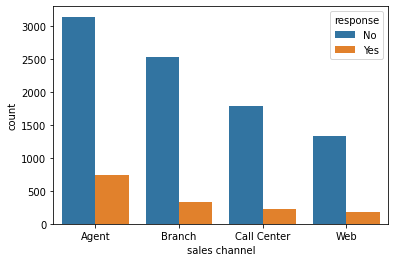

In [13]:
sns.barplot(x='sales channel', y='count', hue = 'response', data = responseBySalesChannel) # hue = 'response'

### As an additional insight we can calculate the ratio between "yes" and "no" responses, to be able to more effectively gauge the efficiency of the sales channel.

In [57]:
salesChannelYesResponse = responseBySalesChannel[responseBySalesChannel["response"]=="Yes"].reset_index()
salesChannelNoResponse = responseBySalesChannel[responseBySalesChannel["response"]=="No"].reset_index()
salesChannelYesResponse

,index,sales channel,response,count
0,1,Agent,Yes,742
1,3,Branch,Yes,326
2,5,Call Center,Yes,221
3,7,Web,Yes,177


<AxesSubplot:xlabel='sales channel', ylabel='ratio'>

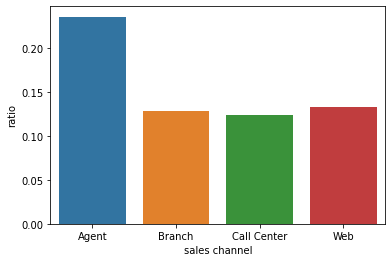

In [59]:
salesChannelYesResponse["ratio"] = salesChannelYesResponse["count"]/salesChannelNoResponse["count"]
sns.barplot(x="sales channel", y="ratio", data=salesChannelYesResponse)

Method 1 with cut, groupby and barplot ## attemp 1 #
reponseByTotalClaimAmount = dfCategorical.groupby([dfCategorical['response'], pd.cut(dfCategorical['total claim amount'], bins=4)])
reponseByTotalClaimAmountUnstacked = reponseByTotalClaimAmount.size().unstack()
reponseByTotalClaimAmountUnstacked

#reponseByTotalClaimAmount = dfCategorical.groupby([dfCategorical['response'], pd.cut(dfCategorical['total claim amount'], bins=4)])

responseBySalesChannel = dfCategorical.groupby(pd.cut(dfCategorical['total claim amount'], bins=4))['response'].count().rename('count').reset_index()

responseBySalesChannel

In [207]:
## Method 1 with cut, groupby and barplot ## attemp 2 #
## Cut continuous variable into bins and save to new column in main dataframe
reponseByTotalClaimAmountCut["binTotalClaimAmount"] = pd.cut(dfCategorical['total claim amount'], bins=10)
dfCategorical["binTotalClaimAmount"]=reponseByTotalClaimAmountCut["binTotalClaimAmount"]

<AxesSubplot:xlabel='binTotalClaimAmount', ylabel='count'>

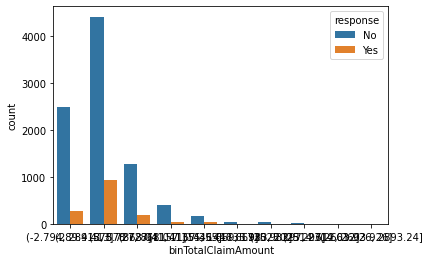

In [209]:
responseBySalesChannel = dfCategorical.groupby(['binTotalClaimAmount', 'response']).size().rename('count').reset_index()

sns.barplot(x="binTotalClaimAmount", y="count", data=responseBySalesChannel, hue="response")

<AxesSubplot:xlabel='total claim amount', ylabel='count'>

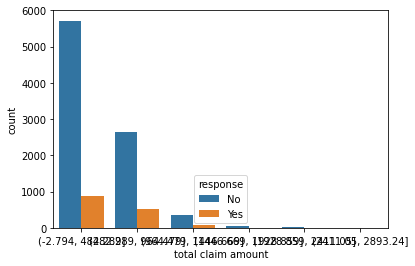

In [136]:
# Method 2 with cut and countplot
reponseByTotalClaimAmountCut = pd.cut(dfCategorical['total claim amount'], bins=6)

sns.countplot(x=reponseByTotalClaimAmountCut, data = dfCategorical, hue="response")

<AxesSubplot:xlabel='income', ylabel='count'>

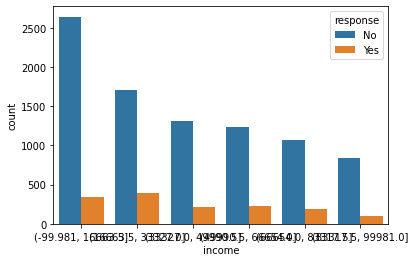

In [137]:
reponseByIncome = pd.cut(dfCategorical['income'], bins=6)

sns.countplot(x=reponseByIncome, data = dfCategorical, hue="response")